
Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




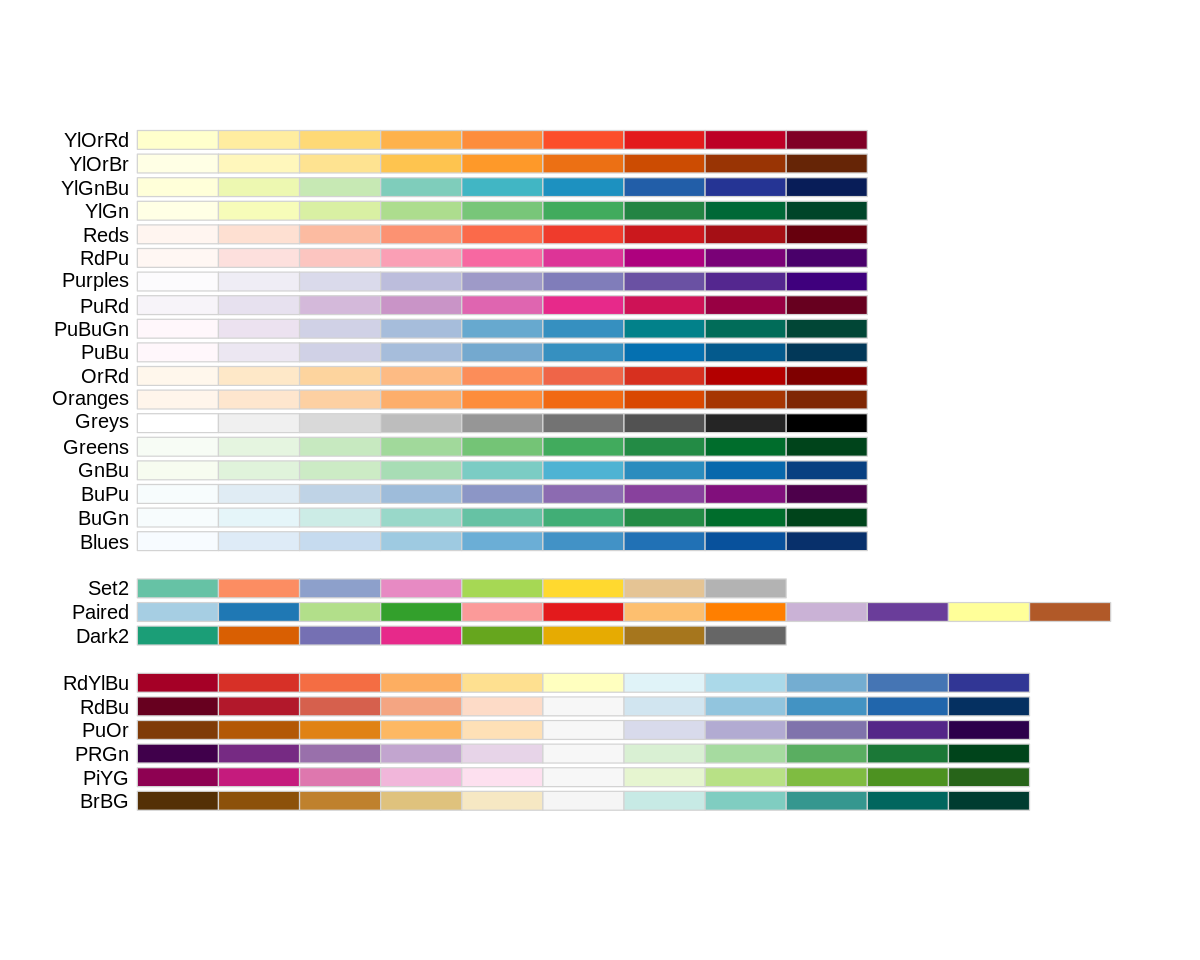

In [9]:
library(tidyverse)
library(repr)
library(scales)
library(RColorBrewer)
library(infer)
# Ensure the Palette used is colour blind friendly
display.brewer.all(colorblindFriendly = TRUE)

In [10]:
# Loading the Dataset
url = "https://raw.githubusercontent.com/fulleraltamiranoe/stat-201-project/main/iris.csv"
iris_data <- read_csv(url) 
head(iris_data)

Rows: 150 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): class
dbl (4): sepal_length, sepal_width, petal_length, petal_width


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



sepal_length,sepal_width,petal_length,petal_width,class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
# Set seed to ensure reproducible randomness
set.seed(1001)

# Treat class as factor and filter for class of interest (Iris-setosa)
iris_sample <- iris_data %>%
    mutate(class = as_factor(class)) %>%
    filter(class == 'Iris-setosa') %>%
    select(sepal_length)
head(iris_sample) # sample size = 50

sepal_length
<dbl>
5.1
4.9
4.7
4.6
5.0
5.4


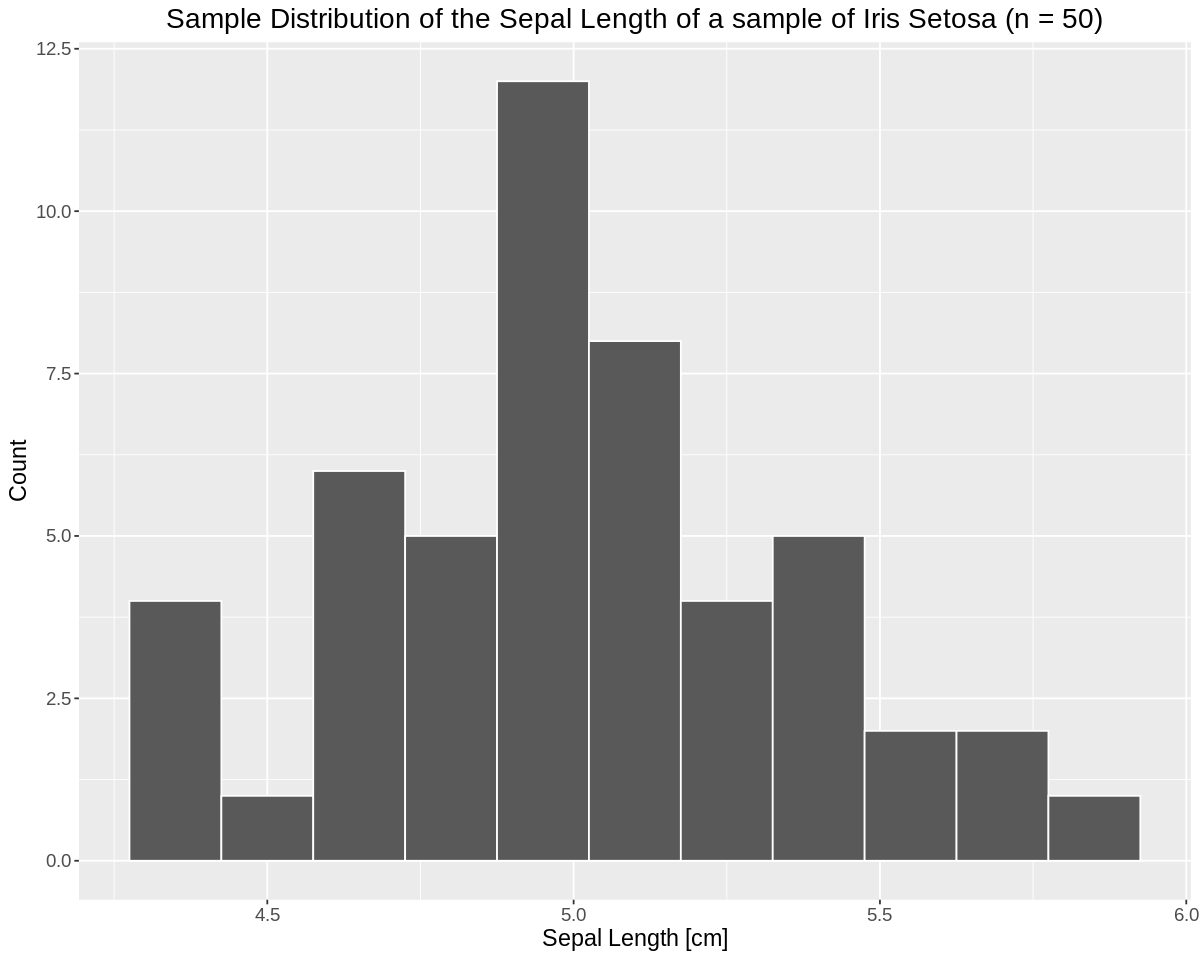

In [12]:
# Visualize Sample Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
iris_sample_dist <- iris_sample %>%
    ggplot(aes(x = sepal_length)) +
    geom_histogram(binwidth = 0.15, colour = 'white') +
    labs(x = 'Sepal Length [cm]', y = 'Count') +
    ggtitle('Sample Distribution of the Sepal Length of a sample of Iris Setosa (n = 50)') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5))
iris_sample_dist

In [13]:
# Point parameter of interest (sepal length mean)
sample_mean <- iris_sample %>%
    summarize(mean = mean(sepal_length))
sample_mean

mean
<dbl>
5.006


In [15]:
# Bootstrap 1500 reps
iris_bootstrap <- iris_sample %>%
    specify(response = sepal_length) %>%
    generate(type = 'bootstrap', reps = 1500) %>%
    calculate(stat = "mean")
head(iris_bootstrap)

replicate,stat
<int>,<dbl>
1,4.998
2,4.818
3,4.930
4,4.978
5,5.010
6,4.998


In [16]:
# confidence intervals 
iris_ci <-iris_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")
iris_ci

lower_ci,upper_ci
<dbl>,<dbl>
4.908,5.096


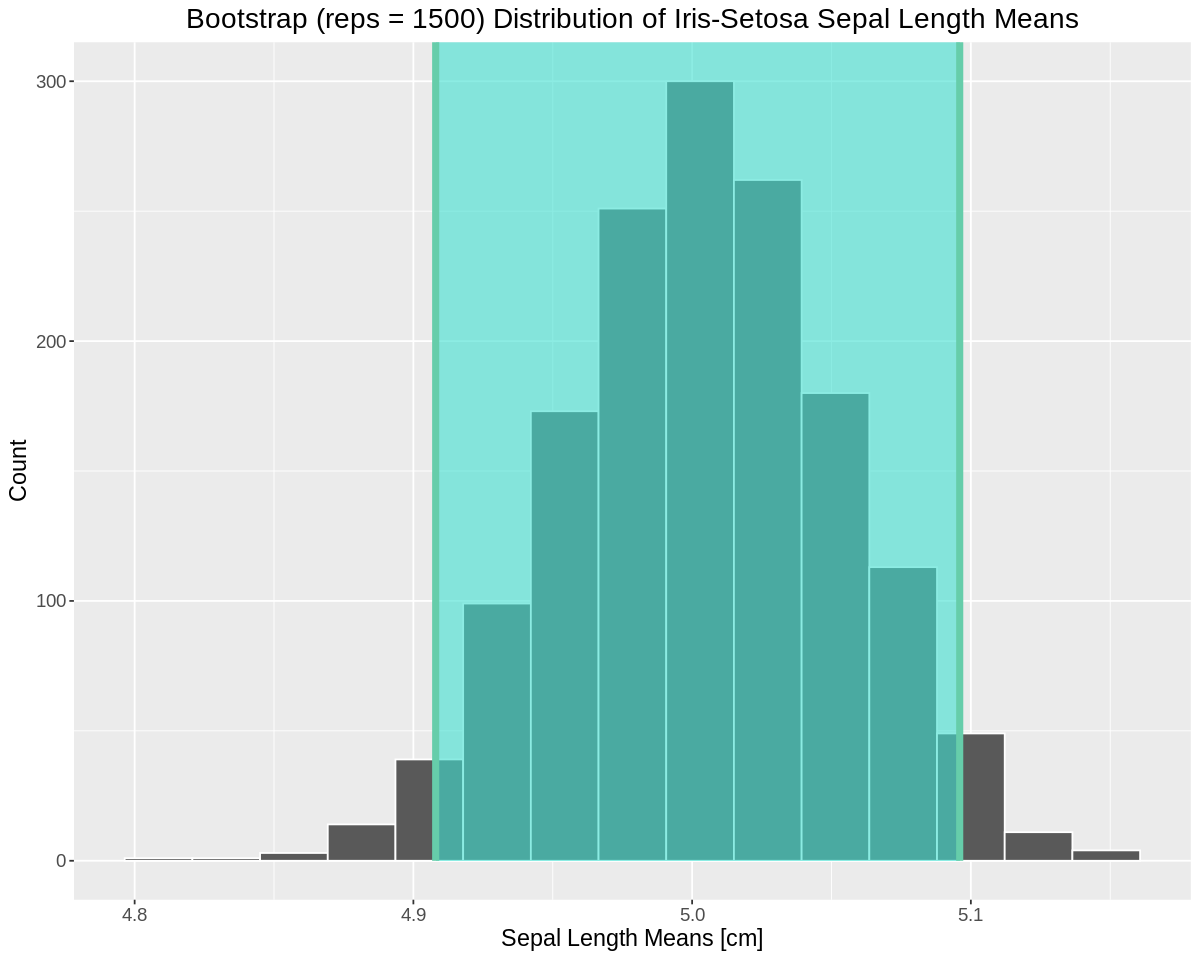

In [19]:
# Initial Visualization of Bootstrap Sampling Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
bootstrap_sd <- iris_bootstrap %>%
    visualize() +
    ggtitle('Bootstrap (reps = 1500) Distribution of Iris-Setosa Sepal Length Means') +
    labs(x = 'Sepal Length Means [cm]', y = 'Count') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) +
    shade_ci(endpoints = iris_ci)
bootstrap_sd